In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib.image as mpimg

In [2]:
data = pd.read_csv('play_by_play2019.csv.gz', compression = 'gzip', low_memory = False)

In [3]:
regular = data.loc[data.season_type == 'REG']

In [4]:
eagles_regular = data.loc[(data.season_type == 'REG') & (data.posteam == 'PHI') &  (data.passer == 'C.Wentz')]

In [5]:
wentz = eagles_regular.groupby('air_yards', as_index = False).agg({'epa':'mean',
                                         'cpoe':'mean',
                                          'play_id':'count'}).sort_values('air_yards',ascending = True)

all_qbs = regular.groupby(['passer','air_yards'], as_index = False).agg({'epa':'mean',
                                         'cpoe':'mean',
                                          'play_id':'count'}).sort_values('air_yards',ascending = True)


In [6]:
wentz = wentz.dropna()
all_qbs = all_qbs.dropna()

In [7]:
f = np.polynomial.polynomial.polyfit(wentz.air_yards, wentz.cpoe, 3)
q = np.polynomial.polynomial.polyfit(all_qbs.air_yards, all_qbs.cpoe, 3)

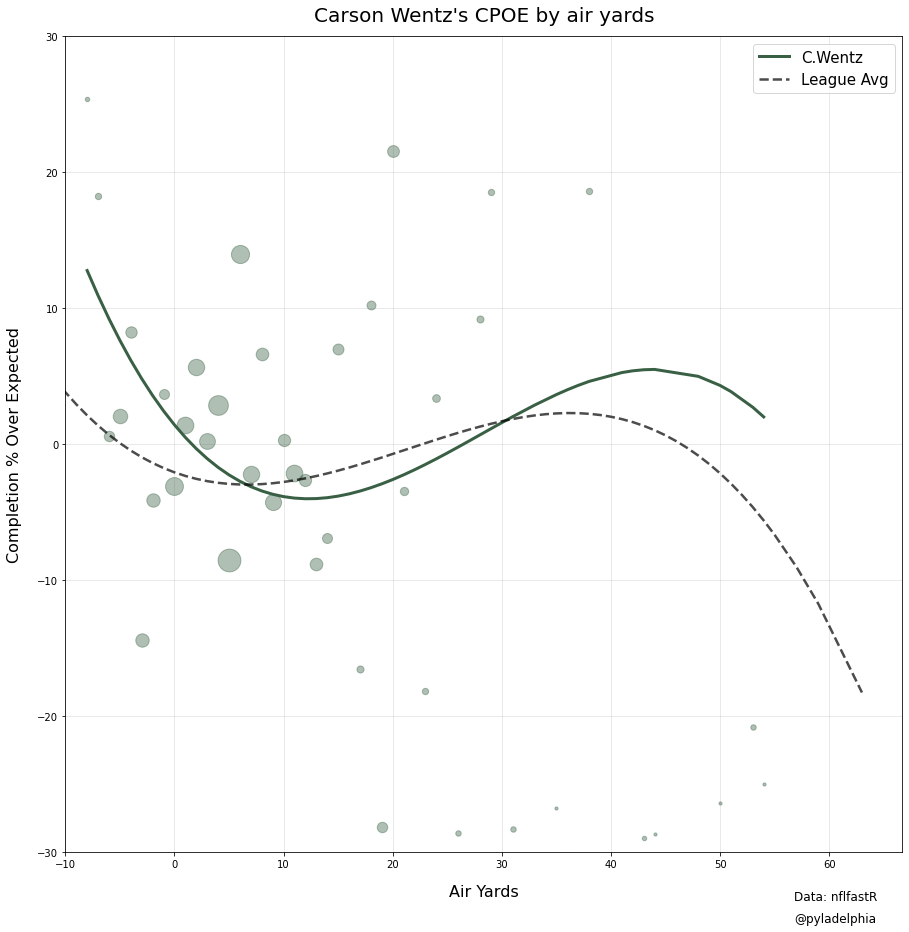

In [8]:
fig, ax = plt.subplots(figsize=(15,15))

#Create a dot for each air_yards measure
#s stands for size, the dot size is proportional to the QBs number of plays
for i in range(len(wentz)):
    ax.scatter(wentz.air_yards.iloc[i], wentz.cpoe.iloc[i],
               s= (wentz.play_id.iloc[i])*10 , alpha=.4,
              color = '#396044')
    
    
yf = [np.polynomial.polynomial.polyval(cx, f) for cx in wentz.air_yards]
ax.plot(wentz.air_yards, yf, linestyle = "-", color = '#396044', linewidth = 3, label = 'C.Wentz');

yq = [np.polynomial.polynomial.polyval(cx, q) for cx in all_qbs.air_yards]
ax.plot(all_qbs.air_yards, yq, linestyle = "--", color = 'black',alpha= .7, linewidth = 2.5, label = 'League Avg');

ax.set_ylim(bottom = -30, top= 30)
ax.set_xlim(left = -10)
#Add grid
ax.grid(zorder=0,alpha=.35)
ax.set_axisbelow(True)

#Remove top and right boundary lines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_title("Carson Wentz's CPOE by air yards",fontsize=20,pad=15)
ax.set_xlabel('Air Yards',fontsize=16,labelpad=15)
ax.set_ylabel('Completion % Over Expected',fontsize=16,labelpad=15)
plt.figtext(.8,.06, '@pyladelphia', fontsize = 12)
plt.figtext(.8,.08,'Data: nflfastR',fontsize=12)
        
plt.legend(loc="upper right", prop = {'size': 15})

#plt.savefig('wentz_cpoe_airyards.png',dpi=400)
plt.show()